In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# nacitanie dat 
dataSet = pd.read_csv("mushrooms.csv", header = 0)

In [3]:
# vizualizacia dat
dataSet

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
# Vytvorenie tabulky pre vyuzitie informacie o farbe rôznych častiach hríbu
lst = {'BLACK':[1],
       'BROWN':[2],
       'BUFF':[3],
       'CHOCOLATE':[4],
       'CINNAMON':[5],
       'GRAY':[6],
       'GREEN':[7],
       'ORANGE':[8],
       'PINK':[9],
       'PURPLE':[10],
       'RED':[11],
       'WHITE':[12],
       'YELLOW':[13]
      }
farba = pd.DataFrame(lst)

farba

,BLACK,BROWN,BUFF,CHOCOLATE,CINNAMON,GRAY,GREEN,ORANGE,PINK,PURPLE,RED,WHITE,YELLOW
0,1,2,3,4,5,6,7,8,9,10,11,12,13


In [5]:
# farba hlavicky hribu - Cap
train1 = np.where(dataSet.iloc[:,3]=='n',farba.iloc[0]['BROWN'],( # brown
            np.where(dataSet.iloc[:,3]=='b',farba.iloc[0]['BUFF'],( # buff
                np.where(dataSet.iloc[:,3]=='c',farba.iloc[0]['CINNAMON'],( # cinnamon
                    np.where(dataSet.iloc[:,3]=='g',farba.iloc[0]['GRAY'],( # gray
                        np.where(dataSet.iloc[:,3]=='r',farba.iloc[0]['GREEN'],( # green
                            np.where(dataSet.iloc[:,3]=='p',farba.iloc[0]['PINK'],( # pink
                                np.where(dataSet.iloc[:,3]=='u',farba.iloc[0]['PURPLE'],( # purple
                                    np.where(dataSet.iloc[:,3]=='e',farba.iloc[0]['RED'],( # red
                                        np.where(dataSet.iloc[:,3]=='w',farba.iloc[0]['WHITE'],farba.iloc[0]['YELLOW']))))))))))))))))) # white,  yellow 
train1

array([ 2, 13, 12, ...,  2,  2,  2], dtype=int64)

In [6]:
# farba lupenov pod hlavickou hribu - Gill
train2 = np.where(dataSet.iloc[:,9]=='k',farba.iloc[0]['BLACK'],( # black   
            np.where(dataSet.iloc[:,9]=='n',farba.iloc[0]['BROWN'],( # brown 
                np.where(dataSet.iloc[:,9]=='b',farba.iloc[0]['BUFF'],( # buff  
                    np.where(dataSet.iloc[:,9]=='h',farba.iloc[0]['CHOCOLATE'],( # chocolate
                        np.where(dataSet.iloc[:,9]=='g',farba.iloc[0]['GRAY'],( # gray
                            np.where(dataSet.iloc[:,9]=='r',farba.iloc[0]['GREEN'],( # green
                                np.where(dataSet.iloc[:,9]=='o',farba.iloc[0]['ORANGE'],( # orange
                                    np.where(dataSet.iloc[:,9]=='p',farba.iloc[0]['PINK'],( # pink
                                        np.where(dataSet.iloc[:,9]=='u',farba.iloc[0]['PURPLE'],( # purple
                                            np.where(dataSet.iloc[:,9]=='e',farba.iloc[0]['RED'],( # red
                                                np.where(dataSet.iloc[:,9]=='w',farba.iloc[0]['WHITE'],farba.iloc[0]['YELLOW']))))))))))))))))))))) # white,  yellow
train2 

array([ 1,  1,  2, ...,  2,  3, 13], dtype=int64)

In [7]:
# farba stonky nad prstenom hriba - Stalk above ring
train3 = np.where(dataSet.iloc[:,14]=='n',1,( # brown 
            np.where(dataSet.iloc[:,14]=='b',2,( # buff
                np.where(dataSet.iloc[:,14]=='c',3,( # cinnamon
                    np.where(dataSet.iloc[:,14]=='g',4,( # gray
                        np.where(dataSet.iloc[:,14]=='o',5,( # orange
                            np.where(dataSet.iloc[:,14]=='p',6,( # pink
                                np.where(dataSet.iloc[:,14]=='e',7,( # red
                                    np.where(dataSet.iloc[:,14]=='w',8,9))))))))))))))) # white, 9 = yellow
train3

array([8, 8, 8, ..., 5, 8, 5])

In [8]:
# farba stonky pod prstenom hriba - Stalk bellow ring
train4 = np.where(dataSet.iloc[:,15]=='n',farba.iloc[0]['BROWN'],( # brown 
            np.where(dataSet.iloc[:,15]=='b',farba.iloc[0]['BUFF'],( # buff
                np.where(dataSet.iloc[:,15]=='c',farba.iloc[0]['CINNAMON'],( # cinnamon
                    np.where(dataSet.iloc[:,15]=='g',farba.iloc[0]['GRAY'],( # gray
                        np.where(dataSet.iloc[:,15]=='o',farba.iloc[0]['ORANGE'],( # orange
                            np.where(dataSet.iloc[:,15]=='p',farba.iloc[0]['PINK'],( # pink
                                np.where(dataSet.iloc[:,15]=='e',farba.iloc[0]['RED'],( # red
                                    np.where(dataSet.iloc[:,15]=='w',farba.iloc[0]['WHITE'],farba.iloc[0]['YELLOW']))))))))))))))) # white, 9 = yellow
train4

array([12, 12, 12, ...,  8, 12,  8], dtype=int64)

In [9]:
# farba prstena hribu - Veil
train5 = np.where(dataSet.iloc[:,17]=='n',farba.iloc[0]['BROWN'],( # brown  
            np.where(dataSet.iloc[:,17]=='o',farba.iloc[0]['ORANGE'],( # orange 
                np.where(dataSet.iloc[:,17]=='w',farba.iloc[0]['WHITE'],farba.iloc[0]['YELLOW']))))) # white, 4 = yellow
                   
train5

array([12, 12, 12, ...,  8, 12,  8], dtype=int64)

In [10]:
# farba vytrusov hribu na papieri - Spore print
train6 = np.where(dataSet.iloc[:,20]=='k',farba.iloc[0]['BLACK'],( # black   
            np.where(dataSet.iloc[:,20]=='n',farba.iloc[0]['BROWN'],( # brown   
                np.where(dataSet.iloc[:,20]=='b',farba.iloc[0]['BUFF'],( # buff   
                    np.where(dataSet.iloc[:,20]=='h',farba.iloc[0]['CHOCOLATE'],( # chocolate  
                        np.where(dataSet.iloc[:,20]=='r',farba.iloc[0]['GREEN'],( # green  
                            np.where(dataSet.iloc[:,20]=='o',farba.iloc[0]['ORANGE'],( # orange   
                                np.where(dataSet.iloc[:,20]=='u',farba.iloc[0]['PURPLE'],( # purple   
                                    np.where(dataSet.iloc[:,20]=='w',farba.iloc[0]['WHITE'],farba.iloc[0]['YELLOW']))))))))))))))) # white, 9 = yellow 
                   
train6

array([ 1,  2,  2, ...,  3, 12,  8], dtype=int64)

In [11]:
# Spojenie vsetkych mnozin do x
# ziskali sme maticu s informaciami o farbach rôznych častiach každého hríbu
x = np.stack((train1, train2, train3, train4, train5, train6), axis=1)
x

array([[ 2,  1,  8, 12, 12,  1],
       [13,  1,  8, 12, 12,  2],
       [12,  2,  8, 12, 12,  2],
       ...,
       [ 2,  2,  5,  8,  8,  3],
       [ 2,  3,  8, 12, 12, 12],
       [ 2, 13,  5,  8,  8,  8]], dtype=int64)

In [12]:
# jednotlive casti hribu su v X ulozene nasledovne
# hlavicka, lupene, stonka nad prstenom , stonka pod prstenom, prsten, vytrusy na papieri 
# cislo v poli reprezentuje danu farbu

# Priklad:
#  HLAVICKA  |  LUPENE   | STONKA NAD P | STONKA POD P |   PRSTEN    |   VYTRUSY
# 2 - BROWN  | 1 - BLACK | 8 - ORANGE   | 12 - WHITE   | 12 - WHITE  | 1 - BLACK
x[0]

array([ 2,  1,  8, 12, 12,  1], dtype=int64)

In [13]:
farba # ukazka farieb

,BLACK,BROWN,BUFF,CHOCOLATE,CINNAMON,GRAY,GREEN,ORANGE,PINK,PURPLE,RED,WHITE,YELLOW
0,1,2,3,4,5,6,7,8,9,10,11,12,13


In [14]:
# urcujeme ci je hrib jedlý alebo otrávený
y = np.where((dataSet.iloc[:,0])=='e',1,0) # ak jedly, tak 1, ak jedovaty tak 0

In [15]:
y

array([0, 1, 1, ..., 1, 0, 1])

C:\Users\marek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

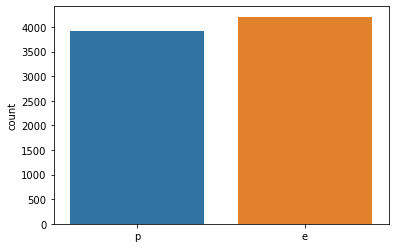

In [16]:
# stlpec class bude urceny na predikciu  
sns.countplot(dataSet.iloc[:,0].values.flatten())

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# rozdelenie dat na trenovacie a testovacie
# test_size - pomer rozdelenia dat medzi trenovacou a testovacou mnozinou 
# random_state - vzdy bude generovat tie iste nahodne cisla
trainX, testX, trainY, testY = train_test_split(x, y, random_state=33, test_size=0.2)

In [19]:
from keras.utils import np_utils
from keras.utils import to_categorical

In [20]:
# vytvorenie kategorickej premennej, nastavenie kategorie vsetkym typom hribom 
kategorickaPremenna = np_utils.to_categorical(trainY)
kategorickaPremenna

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [21]:
# potrebujeme model a vrstvy pre vypocty neuronovych sieti
from keras.models import Sequential # sekvencny model
from keras.layers import Dense # vrstvy - vstupna, skryta, vystupna

In [22]:
KerasModel = Sequential()
# vstupna vrstva bude s 30 neuronmi
# input_dim pocet dimenzii (vrstiev) - 6 stlpcov vstupuju
KerasModel.add(Dense(30, input_dim = 6, activation='softplus'))

# skryta vrstva s 4 neuronmi 
KerasModel.add(Dense(4, activation='softplus'))

# vystupna vrstva ma dve neurony lebo kategoricka premenna ma dve hodnoty 
KerasModel.add(Dense(2, activation="softplus"))
# model je pripraveny treba ho natrenovat

# pred trenovanim ho treba skompilovat
# param strata - loss -> metoda najmensich stvorcov
# optimizer - na zaklade coho sa ma optimalizovat (adam byva najlepsi)
# metrics - pridanie presnosti k vysledku
KerasModel.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])


# trenovanie parametrom trainX a trainY
model = KerasModel.fit(trainX, kategorickaPremenna, epochs=20, batch_size=50)

Epoch 1/20
130/130 [==============================] - 0s 550us/step - loss: 0.3376 - accuracy: 0.5008
Epoch 2/20
130/130 [==============================] - 0s 535us/step - loss: 0.1803 - accuracy: 0.7897
Epoch 3/20
130/130 [==============================] - 0s 543us/step - loss: 0.1389 - accuracy: 0.8146
Epoch 4/20
130/130 [==============================] - 0s 535us/step - loss: 0.1201 - accuracy: 0.8601
Epoch 5/20
130/130 [==============================] - 0s 527us/step - loss: 0.1124 - accuracy: 0.8723
Epoch 6/20
130/130 [==============================] - 0s 535us/step - loss: 0.0993 - accuracy: 0.8916
Epoch 7/20
130/130 [==============================] - 0s 558us/step - loss: 0.0922 - accuracy: 0.8988
Epoch 8/20
130/130 [==============================] - 0s 550us/step - loss: 0.0836 - accuracy: 0.9089
Epoch 9/20
130/130 [==============================] - 0s 519us/step - loss: 0.0814 - accuracy: 0.9138
Epoch 10/20
130/130 [==============================] - 0s 527us/step - loss: 0.079

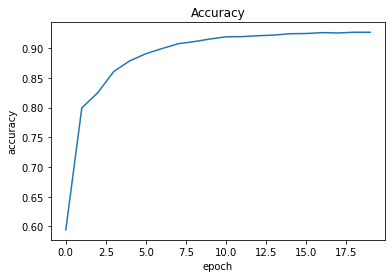

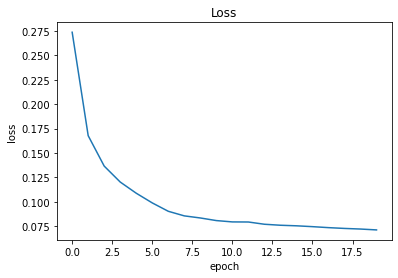

In [23]:
import matplotlib.pyplot as plt

# Sledovanie presnosti vypoctu
plt.plot(model.history['accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# sledovanie straty
plt.plot(model.history['loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [24]:
# Evaluacia siete
encoding_test_y = np_utils.to_categorical(testY)

scores = KerasModel.evaluate(testX, encoding_test_y)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

51/51 [==============================] - 0s 420us/step - loss: 0.0686 - accuracy: 0.9305

Accuracy: 93.05%


In [25]:
# Testovacia mnozina
testY

array([1, 1, 1, ..., 1, 0, 1])

In [26]:
# Predikcia testovacej mnoziny 
predikovane = KerasModel.predict(testX)
predikovane

array([[0.06981257, 0.8680803 ],
       [0.08026931, 0.84388745],
       [0.20336327, 0.74533707],
       ...,
       [0.06947754, 0.9604073 ],
       [0.03538835, 0.9088741 ],
       [0.19046439, 0.74041486]], dtype=float32)

In [27]:
# Porovnanie skutocnych hodnot s predikciou
predikovane = KerasModel.predict(testX)

predikovane_Y = []

for j in predikovane:
    predikovane_Y.append(np.argmax(j))
    
# Zobrazenie do tabulky
tabulka = pd.DataFrame()
tabulka['Predikcia'] = predikovane_Y
tabulka['Realna hodnota'] = testY

tabulka

,Predikcia,Realna hodnota
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
1620,1,1
1621,0,0
1622,1,1
1623,1,0


In [29]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [30]:
# zobrazenie skutocnych a predikovanych hodnot cez maticu
cm = confusion_matrix(y_pred = predikovane_Y, y_true = testY)
cm

array([[703,  91],
       [ 22, 809]], dtype=int64)

<AxesSubplot:>

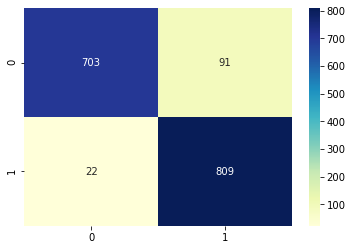

In [31]:
cm = confusion_matrix(y_pred = predikovane_Y, y_true = testY)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")

In [32]:
# Mozeme vidiet na grafe, ze nasa natrenovana siet nam s 93.05% presnostou urcila druh hribu
# 703 hribov zaradila spravne do kategorie jedovatych a 91 zaradila nespravne do jedlych
# 809 hribov zaradila spravne do kategorie jedlych a 22 zaradila nespravne do jedovatych